In [4]:
pip install xgboost

  Using cached xgboost-1.6.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import metrics, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.discriminant_analysis as DA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import warnings
import missingno as ms
warnings.filterwarnings('ignore')

In [58]:
os.chdir("/Users/rickykuehn/Desktop/UCLA/Intensive/Assignment 6/")
titanic = pd.read_csv('Y03_titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [60]:
titanic.columns=['pass#','live','class','name','sex', 'age', 'sibsp', 'parch', 'ticket',
                'fare', 'cabin', 'embarked']
titanic.head()

,pass#,live,class,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
mis = train.isna().sum()
mis_per = train.isna().sum()/len(train)*100
mis_per

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [62]:
mis_table = pd.concat([mis, mis_per], axis=1)
mis_table1 = mis_table.rename(columns = {0:'Missing Values', 1:'Missing Percent (%)'})
mis_table1

,Missing Values,Missing Percent (%)
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [63]:
mis_table2 = mis_table1[mis_table1.iloc[:,1]!= 0].sort_values('Missing Percent (%)', ascending=False).round(1)
mis_table2

,Missing Values,Missing Percent (%)
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


<AxesSubplot:>

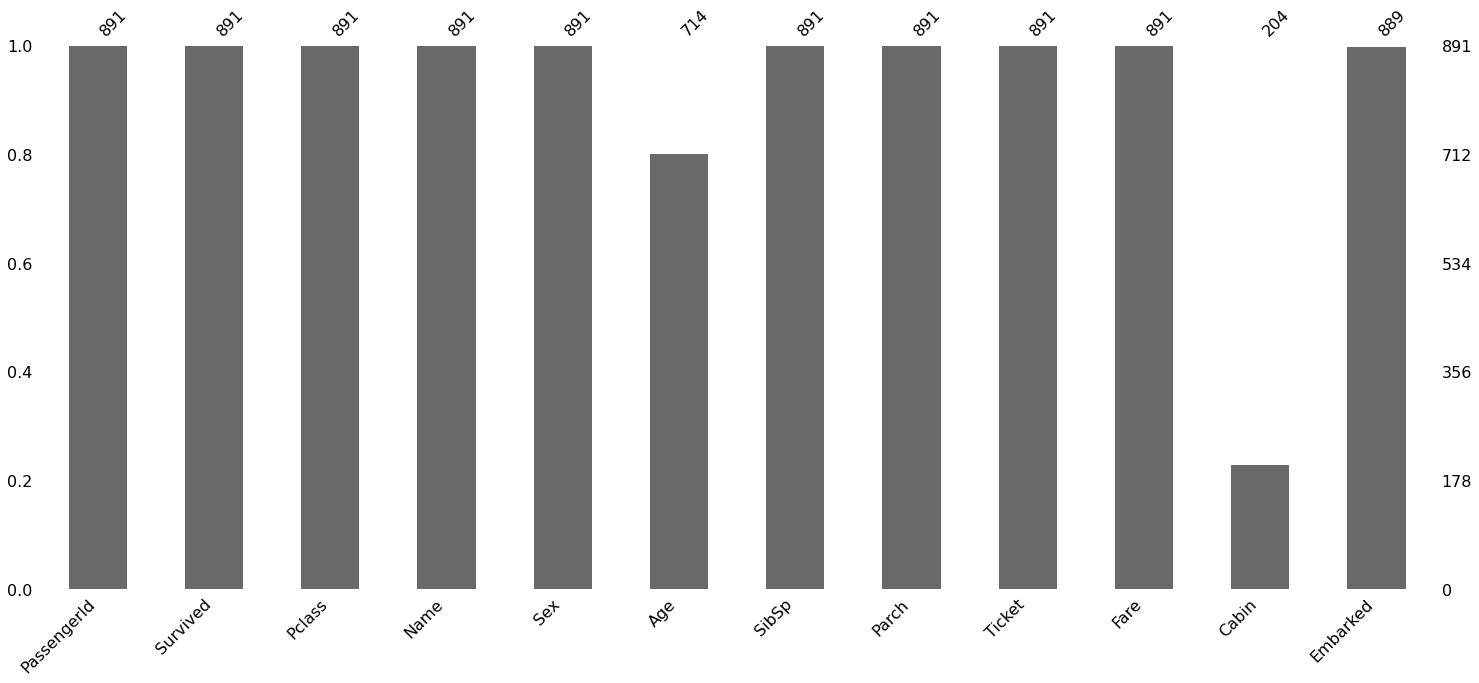

In [64]:
ms.bar(train)

<AxesSubplot:>

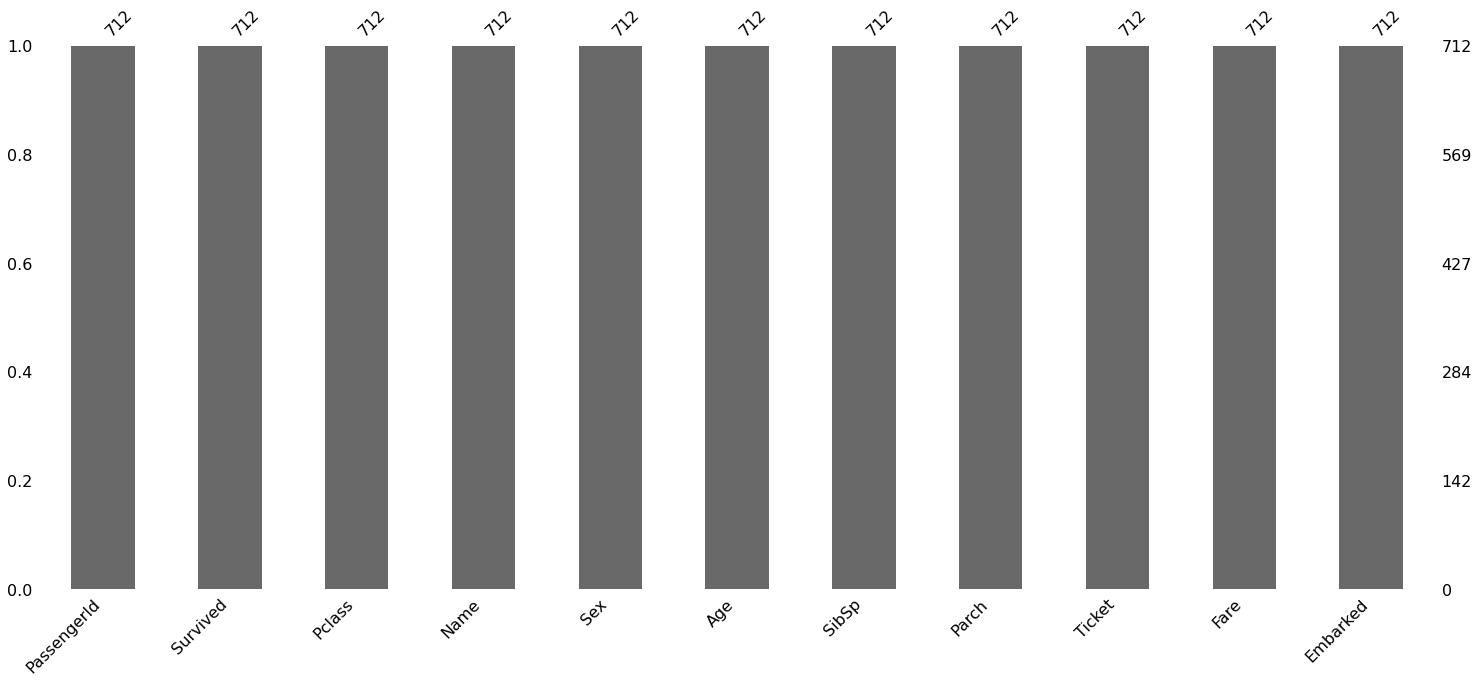

In [69]:
train2 = train.drop("Cabin", axis=1)
train3 = train2.dropna()
ms.bar(train3)

In [78]:
train3.columns=['pass#','live','class','name','male', 'age', 'sibsp', 'parch', 'ticket',
                'fare', 'embarked']
train3.head()

y = train3['live']
titanic = train3[['class', 'male', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
X1.head()

,class,male,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [79]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   class     712 non-null    int64  
 1   male      712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 44.5+ KB


titanic.male.replace({"male":1, "female":0}, inplace = True)

In [82]:
titanic2 = pd.get_dummies(titanic,columns= ['embarked'])
titanic2.head()

,class,male,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [86]:
sc = StandardScaler()
X = sc.fit_transform(titanic2)
X[0:5]
y= 

array([[ 0.90859974,  0.75613751, -0.52766856,  0.52251079, -0.50678737,
        -0.51637992, -0.47261792, -0.20232566,  0.53403984],
       [-1.48298257, -1.32251077,  0.57709388,  0.52251079, -0.50678737,
         0.69404605,  2.11587407, -0.20232566, -1.87251946],
       [ 0.90859974, -1.32251077, -0.25147795, -0.55271372, -0.50678737,
        -0.50362035, -0.47261792, -0.20232566,  0.53403984],
       [-1.48298257, -1.32251077,  0.36995092,  0.52251079, -0.50678737,
         0.35032585, -0.47261792, -0.20232566,  0.53403984],
       [ 0.90859974,  0.75613751,  0.36995092, -0.55271372, -0.50678737,
        -0.50125747, -0.47261792, -0.20232566,  0.53403984]])

<h3>Logistic Regression</h3> 

In [96]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

# penalty: L2 Ridge, C is the inverse of the regulization (1/lambda), smaller C result in larger penalization
lr = LogisticRegression(penalty='l2', C=10, random_state = 5) 
lr01 = lr.fit(X_train, y_train)
y_test_pred = lr01.predict(X_test)

print("Test Accuracy: %.3f" %metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Test Accuracy: 0.794
[[117  19]
 [ 25  53]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       136
           1       0.74      0.68      0.71        78

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.79      0.79      0.79       214



<h3>K Nearest Neighbors (KNN)</h3> 

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn01 = knn.fit(X_train, y_train)
y_test_pred = knn01.predict(X_test)

print("Test Accuracy: %.3f" %metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Test Accuracy: 0.832
[[120  16]
 [ 20  58]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       136
           1       0.78      0.74      0.76        78

    accuracy                           0.83       214
   macro avg       0.82      0.81      0.82       214
weighted avg       0.83      0.83      0.83       214



<h3>Support Vector Machines (SVM)</h3> 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

svm = SVC(kernel='linear', C=1.0, random_state = 15)
svm01 = svm.fit(X_train, y_train)
y_test_pred = svm01.predict(X_test)

print("Test Accuracy: %.3f" %metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Test Accuracy: 0.780
[[115  21]
 [ 26  52]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       136
           1       0.71      0.67      0.69        78

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214



<h3>Naive Bayesian</h3> 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

nb = GaussianNB()
nb01 = nb.fit(X_train, y_train)
y_test_pred = nb01.predict(X_test)

print("Test Accuracy: %.3f" %metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Test Accuracy: 0.762
[[109  27]
 [ 24  54]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       136
           1       0.67      0.69      0.68        78

    accuracy                           0.76       214
   macro avg       0.74      0.75      0.74       214
weighted avg       0.76      0.76      0.76       214



<h3>Linear Discriminant Analysis (LDA)</h3> 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

lda = DA.LinearDiscriminantAnalysis()
lda01 = lda.fit(X_train, y_train)
y_test_pred = lda01.predict(X_test)

print("Test Accuracy: %.3f" %metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Test Accuracy: 0.804
[[119  17]
 [ 25  53]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       136
           1       0.76      0.68      0.72        78

    accuracy                           0.80       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.80      0.80      0.80       214



<h3>Quadratic Discriminant Analysis (QDA)</h3>

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

qda = DA.QuadraticDiscriminantAnalysis()
qda01 = qda.fit(X_train, y_train)
y_test_pred = qda01.predict(X_test)

print("Test Accuracy: %.3f" %metrics.accuracy_score(y_test, y_test_pred))
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Test Accuracy: 0.771
[[109  27]
 [ 22  56]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       136
           1       0.67      0.72      0.70        78

    accuracy                           0.77       214
   macro avg       0.75      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



<h3>Put All Models Together</h3> 

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

names = ["Logit","NBayes", "LDA", "QDA", "KNN", "SVM"]
classifiers = [LogisticRegression(C=7), 
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(), 
               DA.QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors=6), 
               SVC(kernel='rbf', gamma = .18)]

print('Model Accuracy\n'+14*'-')
for name , clf in zip(names , classifiers):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print('{:6} {:3.3f} '.format(name , metrics.accuracy_score(y_test,y_pred)))

Model Accuracy
--------------
Logit  0.794 
NBayes 0.762 
LDA    0.804 
QDA    0.771 
KNN    0.827 
SVM    0.822 


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

names = ["Logit","NBayes", "LDA", "QDA", "KNN", "SVM"]
classifiers = [LogisticRegression(C=7), 
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(), 
               DA.QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors=6), 
               SVC(kernel='linear', C=9, random_state = 5)]

print('Model  Kappa Accuracy\n'+25*'-')
for name , clf in zip(names , classifiers):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print('{:6} {:3.3f} {:3.3f} '.format(name , metrics.cohen_kappa_score(y_test,y_pred),
                                         metrics.accuracy_score(y_test,y_pred)))

Model  Kappa Accuracy
-------------------------
Logit  0.549 0.794 
NBayes 0.490 0.762 
LDA    0.567 0.804 
QDA    0.512 0.771 
KNN    0.611 0.827 
SVM    0.519 0.780 


In [ ]:
#Adjusted n_neighbors to 6 to get higher Kappa

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9)

names = ["Logit","NBayes", "LDA", "QDA", "KNN", "SVM"]
classifiers = [LogisticRegression(C=7), 
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(), 
               DA.QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(n_neighbors=6), 
               SVC(kernel='linear', C=9, random_state = 5)]

print('Model  Kappa Accuracy\n'+25*'-')
for name , clf in zip(names , classifiers):
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print('{:6} {:3.3f} {:3.3f} '.format(name , metrics.cohen_kappa_score(y_test,y_pred),
                                         metrics.accuracy_score(y_test,y_pred)))

Model  Kappa Accuracy
-------------------------
Logit  0.531 0.785 
NBayes 0.487 0.766 
LDA    0.507 0.776 
QDA    0.115 0.458 
KNN    0.450 0.757 
SVM    0.537 0.790 


In [134]:
knn = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')
knn02 = knn.fit(X, y)
knn_pred = knn02.predict(X)

print("Test Accuracy: %.3f" %metrics.accuracy_score(y, knn_pred))
print(metrics.confusion_matrix(y, knn_pred))
print(metrics.classification_report(y, knn_pred))

confus = metrics.confusion_matrix(knn_pred, y)
print('Confusion Matrix:\n', confus)

Test Accuracy: 0.840
[[399  25]
 [ 89 199]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       424
           1       0.89      0.69      0.78       288

    accuracy                           0.84       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.85      0.84      0.84       712

Confusion Matrix:
 [[399  89]
 [ 25 199]]
